# 0.0 Imports

In [99]:
import numpy          as np
import pandas         as pd
import seaborn        as sns
import warnings
import plotly.express as px

from matplotlib           import pyplot    as plt
from matplotlib           import gridspec
from IPython.display      import display
from IPython.core.display import HTML

warnings.filterwarnings( 'ignore' )
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## 0.1 Load Data

In [100]:
data = pd.read_csv('../Datasets/kc_house_data.csv')

## 0.2 Auxiliar Functions

In [101]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()

In [102]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


# 1.0 Data Description

In [103]:
display(data.head(20))

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503
5,7237550310,20140512T000000,1225000.00,4,4.50,5420,101930,1.00,0,0,3,11,3890,1530,2001,0,98053,47.66,-122.00,4760,101930
6,1321400060,20140627T000000,257500.00,3,2.25,1715,6819,2.00,0,0,3,7,1715,0,1995,0,98003,47.31,-122.33,2238,6819
7,2008000270,20150115T000000,291850.00,3,1.50,1060,9711,1.00,0,0,3,7,1060,0,1963,0,98198,47.41,-122.31,1650,9711
8,2414600126,20150415T000000,229500.00,3,1.00,1780,7470,1.00,0,0,3,7,1050,730,1960,0,98146,47.51,-122.34,1780,8113
9,3793500160,20150312T000000,323000.00,3,2.50,1890,6560,2.00,0,0,3,7,1890,0,2003,0,98038,47.37,-122.03,2390,7570


## 1.1 Data Types

In [104]:
print(data.info(memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

## 1.2 Data Dimensions

In [105]:
print(f'Number of rows: {data.shape[0]} \nNumber of columns: {data.shape[1]}')

Number of rows: 21613 
Number of columns: 21


## 1.3 Descriptive Statistics

In [106]:
num_attributes = data.select_dtypes(include=['int64', 'float64'])

# central tendency - media, mediana
mean = pd.DataFrame( num_attributes.apply( np.mean, axis=0 ) )
median = pd.DataFrame( num_attributes.apply( np.median, axis=0 ) )

# dispersion - std, min, max
std = pd.DataFrame( num_attributes.apply( np.std, axis=0 ) )
min_ = pd.DataFrame( num_attributes.apply( np.min, axis=0 ) )
max_ = pd.DataFrame( num_attributes.apply( np.max, axis=0 ) )

# concatenate metrics
df1 = pd.concat( [max_, min_, mean, median, std], axis=1 ).reset_index()
df1.columns = ['attributes', 'maximo', 'minimum', 'mean', 'median', 'std' ]

display(df1)

print(f'Number of rows: {df1.shape[0]} \nNumber of columns: {df1.shape[1]}')

,attributes,maximo,minimum,mean,median,std
0,id,9900000190.00,1000102.00,4580301520.86,3904930410.00,2876499023.43
1,price,7700000.00,75000.00,540088.14,450000.00,367118.70
2,bedrooms,33.00,0.00,3.37,3.00,0.93
3,bathrooms,8.00,0.00,2.11,2.25,0.77
4,sqft_living,13540.00,290.00,2079.90,1910.00,918.42
5,sqft_lot,1651359.00,520.00,15106.97,7618.00,41419.55
6,floors,3.50,1.00,1.49,1.50,0.54
7,waterfront,1.00,0.00,0.01,0.00,0.09
8,view,4.00,0.00,0.23,0.00,0.77
9,condition,5.00,1.00,3.41,3.00,0.65


Number of rows: 20 
Number of columns: 6


## 1.4 Histrograms

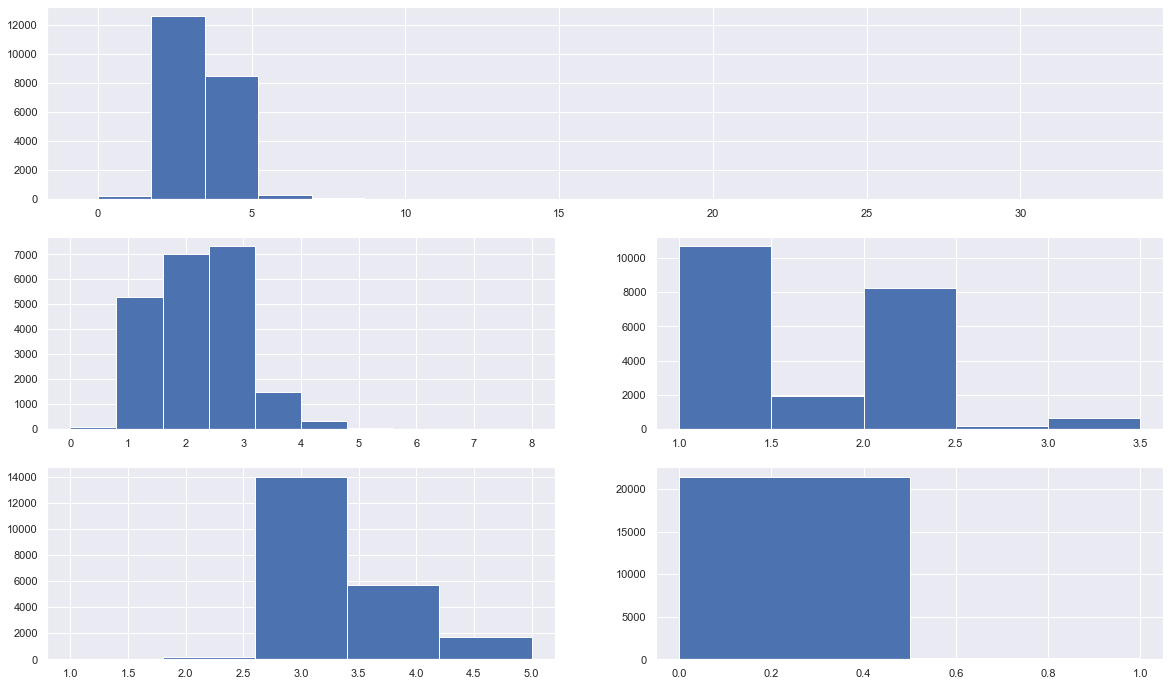

In [107]:
# grid layout to subplots
fig = plt.figure(figsize=(20,12))
specs = gridspec.GridSpec( nrows=3, ncols=2, figure=fig )

ax1 = fig.add_subplot( specs[0,:] )
ax2 = fig.add_subplot( specs[1,0] )
ax3 = fig.add_subplot( specs[1,1] )
ax4 = fig.add_subplot( specs[2,0] )
ax5 = fig.add_subplot( specs[2,1] )

# houses per bedrooms
ax1.hist( x='bedrooms', bins=19, data=num_attributes);

# houses per bathrooms
ax2.hist( x='bathrooms', bins=10, data=num_attributes );

# houses per floors
ax3.hist( x='floors', bins=5, data=num_attributes );

# houses per condition
ax4.hist( x='condition', bins=5, data=num_attributes );

# houses per waterview
ax5.hist( x='waterfront', bins=2, data=num_attributes );

## 1.5 Quartiles

In [108]:
# price quartile
quart = list(data['price'].quantile([0.25, 0.5, 0.75])) 
print( quart )

[321950.0, 450000.0, 645000.0]


# 2.0 Feature Engineering

## 2.1 Change Data Type

In [109]:
data['date'] = pd.to_datetime( data['date'] )

## 2.2 New Data Columns

In [110]:
data['year'] = pd.to_datetime( data['date'] ).dt.year
data['year_month'] = pd.to_datetime( data['date'] ).dt.strftime( '%Y-%m' )
data['year_week'] = pd.to_datetime( data['date'] ).dt.strftime( '%Y-%U' )
data['month'] = pd.to_datetime( data['date'] ).dt.month

## 2.3 Waterfront Categorical Column

In [111]:
data['is_waterfront'] = data['waterfront'].apply(  lambda x: 'no' if x == 0 else 'yes')

## 2.4 Price Level Column

In [112]:
quartile = list( data['price'].quantile([0.25, 0.50, 0.75]) )

data['price_level'] = data['price'].apply( lambda x: 'level_one'   if x<= quartile[0] else
                                                     'level_two'   if ( x > quartile[0] ) & ( x <= quartile[1] ) else
                                                     'level_three' if ( x > quartile[1] ) & ( x <= quartile[2] ) else
                                                     'level_four' )

## 2.5 Condition Status

In [113]:
data['status_condition'] = data['condition'].apply( lambda x: 'bad'     if x <= 2 else
                                                              'regular' if x == 3 else
                                                              'good'    if x == 4 else
                                                              'excelent')

## 2.6 Renovated Status

In [114]:
data['renovated'] = data['yr_renovated'].apply( lambda x: 'no' if x == 0 else 'yes' )

## 2.7 Price per Lot Size

In [115]:
data['price/sqft_lot'] = data['price']/data['sqft_lot']

# 3.0 Data Filtering

## 3.1 Check NA

In [116]:
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
year                0
year_month          0
year_week           0
month               0
is_waterfront       0
price_level         0
status_condition    0
renovated           0
price/sqft_lot      0
dtype: int64

## 3.2 Fillout NA

## 3.3 Data Filtering

In [117]:
# bedrooms
data = data[ data['bedrooms'] != 33 ]

## 3.4 Select Columns

In [118]:
# grade
data = data.drop( columns='grade')

# sqft_above
data = data.drop( columns='sqft_above')

# sqft_living15
data = data.drop( columns='sqft_living15')

# sqft_lot15
data = data.drop( columns='sqft_lot15' )

# 4.0 Data Exploratory Analysis

In [119]:
# numerical attributes
num_attributes = data.select_dtypes( include=['int64', 'float64'] )

# categorical attributes
cat_attributes = data.select_dtypes( include='object' )

In [120]:
cat_attributes.head()

,year_month,year_week,is_waterfront,price_level,status_condition,renovated
0,2014-10,2014-41,no,level_one,regular,no
1,2014-12,2014-49,no,level_three,regular,yes
2,2015-02,2015-08,no,level_one,regular,no
3,2014-12,2014-49,no,level_three,excelent,no
4,2015-02,2015-07,no,level_three,regular,no


## 4.1. Univariate Analysis

### 4.1.1. Response Variable

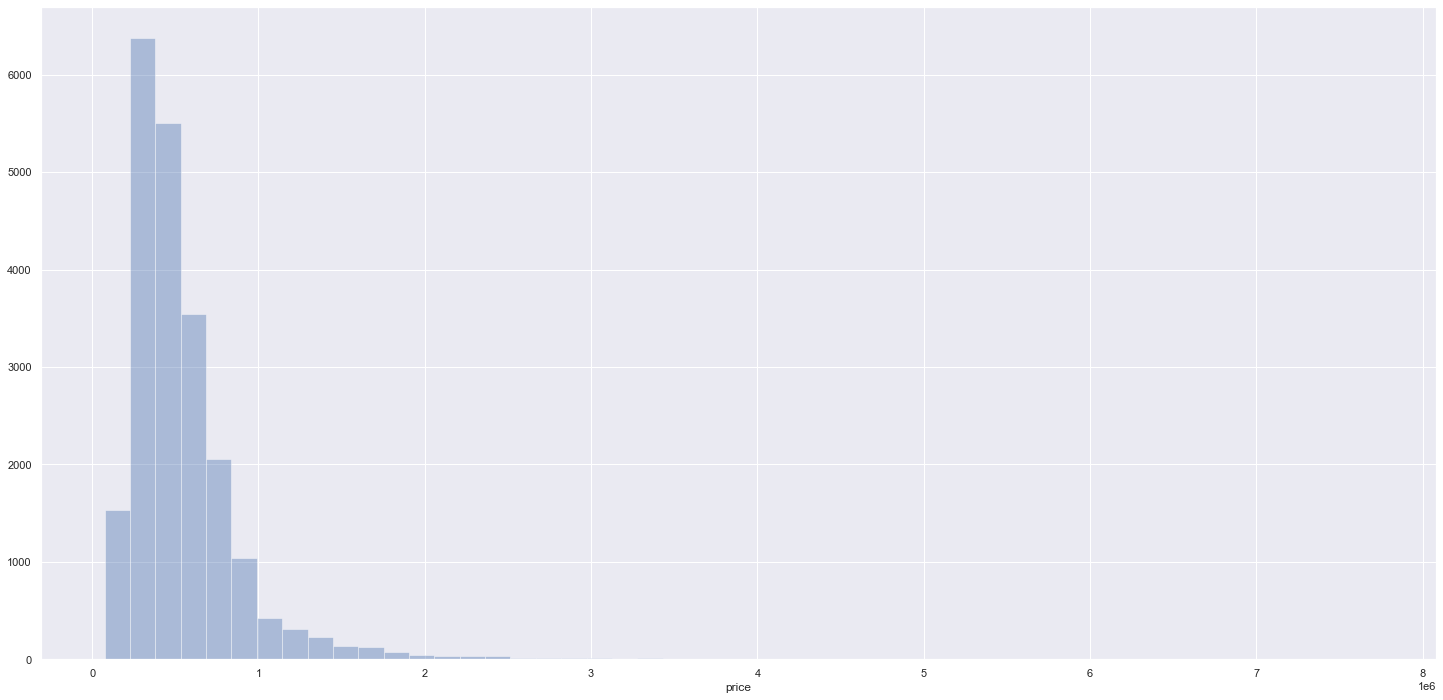

In [121]:
sns.distplot( data['price'], kde=False );

### 4.1.2. Numerical Variable

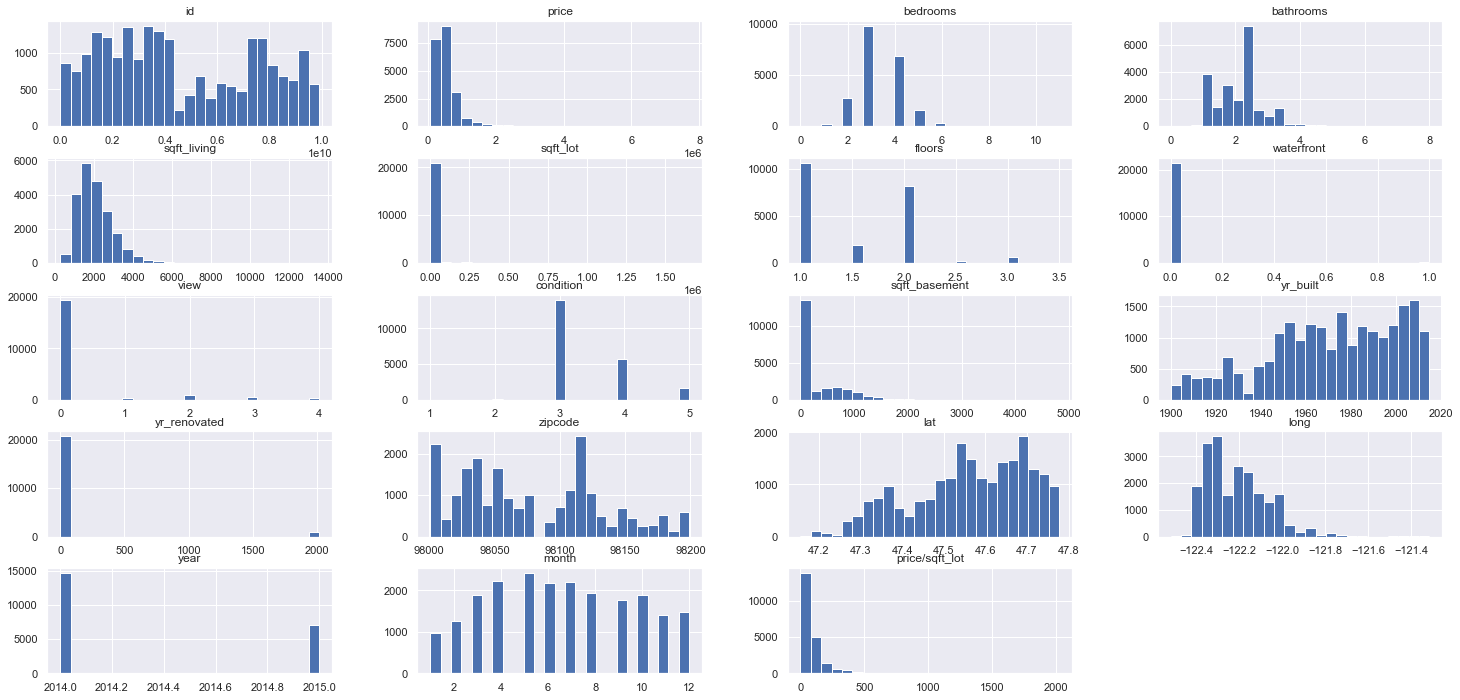

In [122]:
num_attributes.hist( bins=25 );

### 4.1.3. Categorical Variable

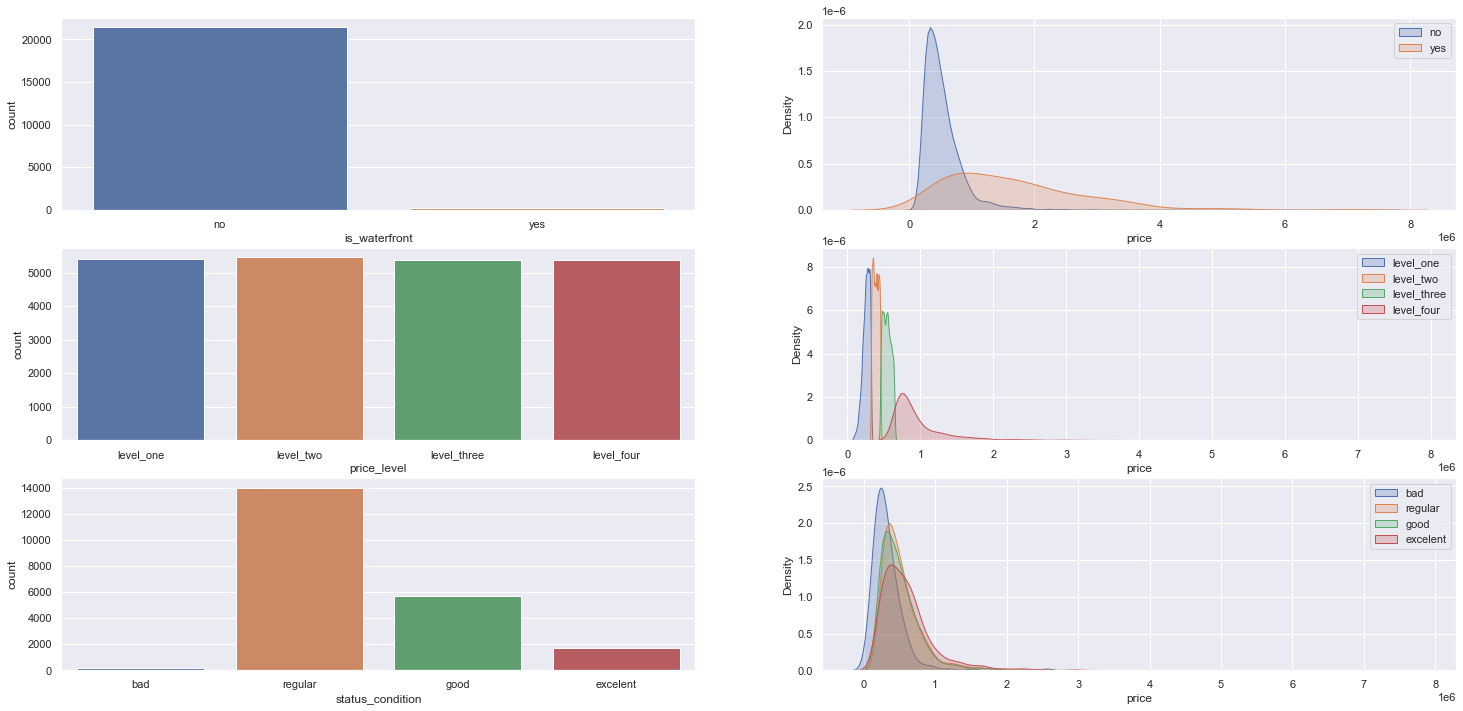

In [123]:
# waterfront 
plt.subplot( 3, 2, 1 )
sns.countplot( cat_attributes['is_waterfront'] );

plt.subplot( 3, 2, 2 )
sns.kdeplot( data[data['is_waterfront'] == 'no']['price'], label='no', shade=True );
sns.kdeplot( data[data['is_waterfront'] == 'yes']['price'], label='yes', shade=True );
plt.legend();

# price level 
plt.subplot( 3, 2, 3 )
sns.countplot( cat_attributes['price_level'], order=['level_one', 'level_two', 'level_three', 'level_four'] );

plt.subplot( 3, 2, 4 )
sns.kdeplot( data[data['price_level'] == 'level_one']['price'], label='level_one', shade=True );
sns.kdeplot( data[data['price_level'] == 'level_two']['price'], label='level_two', shade=True );
sns.kdeplot( data[data['price_level'] == 'level_three']['price'], label='level_three', shade=True );
sns.kdeplot( data[data['price_level'] == 'level_four']['price'], label='level_four', shade=True );
plt.legend();

#status condition
plt.subplot( 3, 2, 5 )
sns.countplot( cat_attributes['status_condition'], order=['bad', 'regular', 'good', 'excelent'] );

plt.subplot( 3, 2, 6 )
sns.kdeplot( data[data['status_condition'] == 'bad']['price'], label='bad', shade=True );
sns.kdeplot( data[data['status_condition'] == 'regular']['price'], label='regular', shade=True );
sns.kdeplot( data[data['status_condition'] == 'good']['price'], label='good', shade=True );
sns.kdeplot( data[data['status_condition'] == 'excelent']['price'], label='excelent', shade=True );
plt.legend();

## 4.2. Bivariate Analysis

### H1: Houses with a water view are 30% more esspensive, in average.

**FALSE:** Houses with a water view are 3000% more expensive, in average.

,is_waterfront,price
0,no,531558.54
1,yes,1661876.02


Houses with waterview is 3.13 more expensive than without


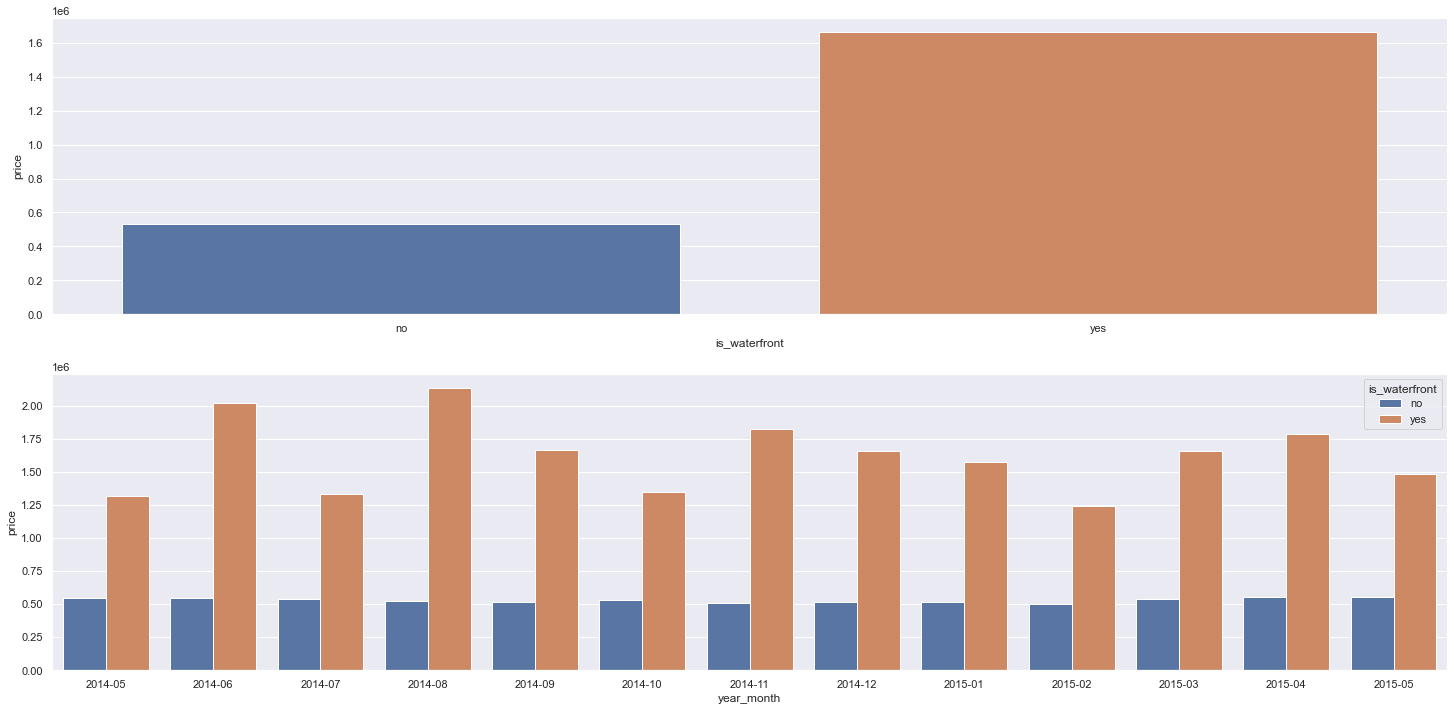

In [124]:
plt.subplot( 2, 1, 1 )
aux1 = data[['price', 'is_waterfront']].groupby( 'is_waterfront' ).mean().reset_index()
sns.barplot( x='is_waterfront', y='price', data=aux1 );

plt.subplot( 2, 1, 2 )
aux2 = data[['year_month', 'is_waterfront', 'price']].groupby( ['year_month', 'is_waterfront'] ).mean().reset_index()
sns.barplot( x='year_month', y='price', hue='is_waterfront', data=aux2 );

display( aux1 )
delta = np.round(aux1['price'][1] / aux1['price'][0], 2 )
print( f'Houses with waterview is \033[1m{delta}\033[0m more expensive than without' )

### H2: Houses with a construction date before than 1955 are 50% cheaper, in average.

**FALSE:** The construction date has low influence on the price of houses.

,before_after,price
0,after_1955,540213.16
1,before_1955,561905.50


 Variation between houses contruction before and after 1955 is 1.04


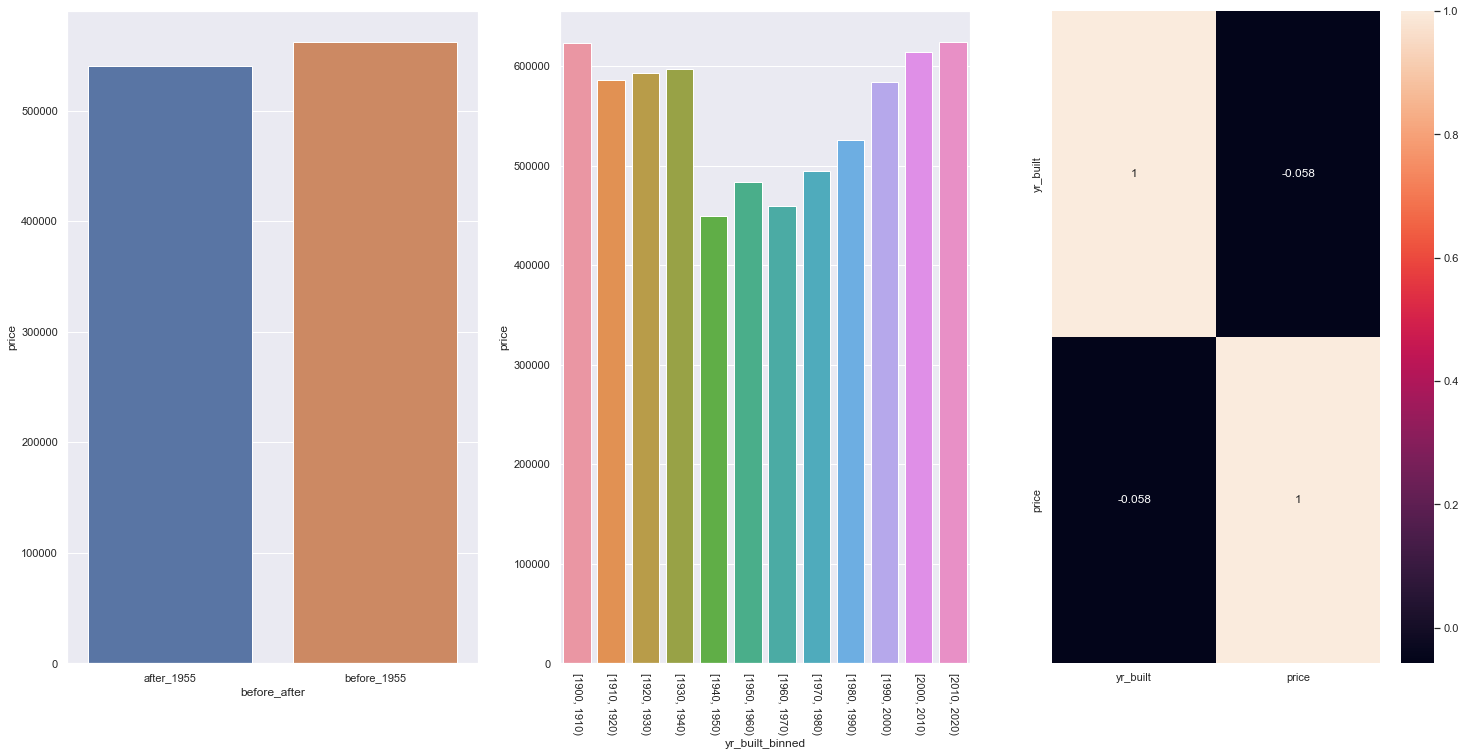

In [125]:
aux1 = data[['yr_built', 'price']].groupby( 'yr_built' ).mean().reset_index()


plt.subplot( 1, 3, 1 )
aux1['before_after'] = aux1['yr_built'].apply( lambda x: 'before_1955' if x <= 1955 else 'after_1955' )
aux2 = aux1[['before_after', 'price']].groupby( 'before_after' ).mean().reset_index()
display( aux2 )
delta = np.round( aux2['price'][1] / aux2['price'][0], 2 )
print( f' Variation between houses contruction before and after 1955 is \033[1m{delta}\033[0m' )
sns.barplot( x='before_after', y='price', data=aux2 );

plt.subplot( 1, 3, 2 )
bins = list( np.arange( 1900, 2030, 10) )
aux1['yr_built_binned'] = pd.cut( aux1['yr_built'], bins=bins, right=False )
aux3 = aux1[['yr_built_binned', 'price']].groupby( 'yr_built_binned' ).mean().reset_index()
sns.barplot( x='yr_built_binned', y='price', data=aux3 );
plt.xticks( rotation=270 );

plt.subplot( 1 , 3, 3 )
sns.heatmap( aux1.corr( method='pearson' ), annot=True );

#plt.savefig( '../Images/Hyphotesis2-Bivariate-Analysis.png' )



### H3: Houses without a basement have a lot size 50% larger than thoses with a basement.

**FALSE:** Houses without a basement have a lot size around 20% smaller than thoses with a basement.

,basement,price
0,no,486884.09
1,yes,622371.49


 Variation between houses without basement and with basement 0.78


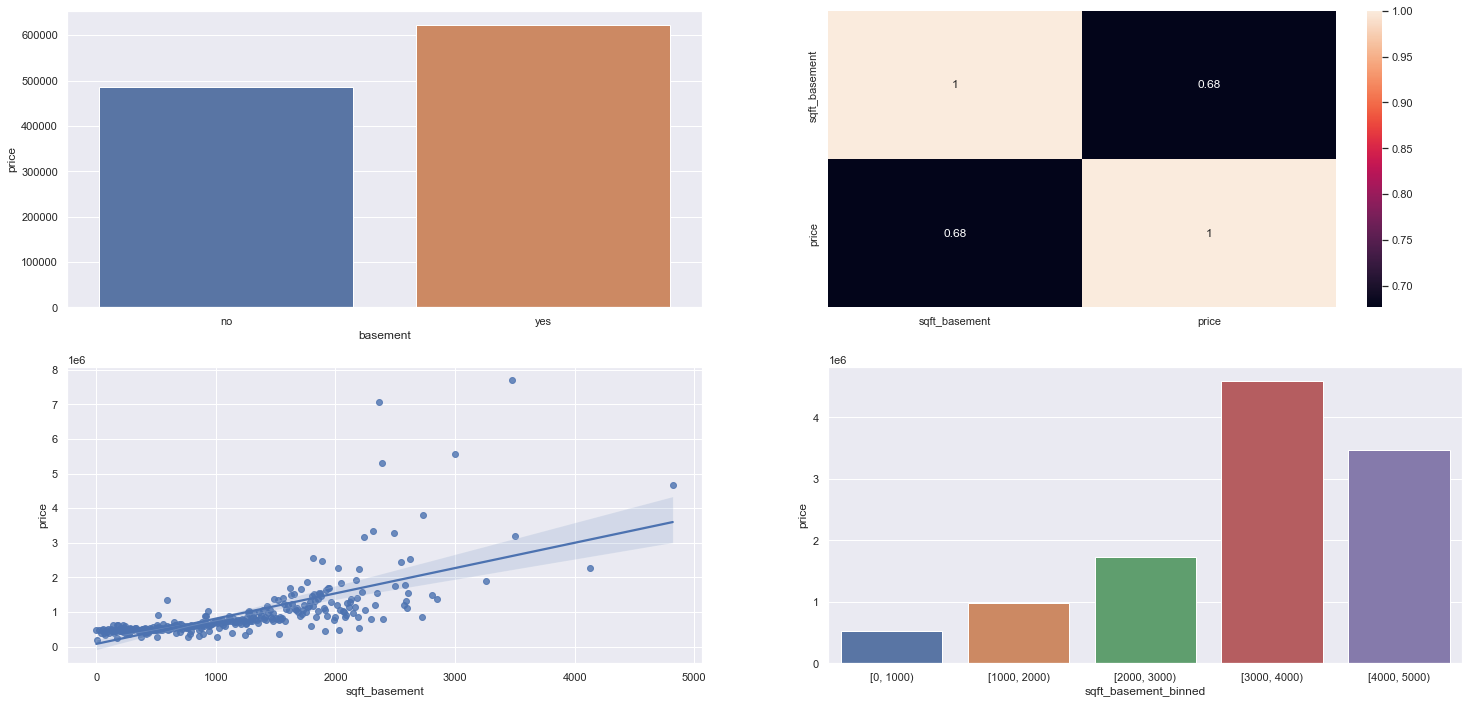

In [126]:
data['basement'] = data['sqft_basement'].apply( lambda x: 'yes' if x != 0 else 'no' )

aux1 = data[['basement', 'price']].groupby( 'basement' ).mean().reset_index()
display( aux1 )
delta = np.round(aux1['price'][0] / aux1['price'][1], 2 )
print( f' Variation between houses without basement and with basement \033[1m{delta}\033[0m' )

plt.subplot( 2, 2, 1 )
sns.barplot( x='basement', y='price', data=aux1 );

plt.subplot( 2, 2, 2 )
aux2 = data[['sqft_basement', 'price']].groupby( 'sqft_basement' ).mean().reset_index()
sns.heatmap( aux2.corr( method='pearson' ), annot=True );

plt.subplot( 2, 2, 3 )
sns.regplot( x='sqft_basement', y='price', data=aux2 );

plt.subplot( 2, 2, 4 )
bins = list( np.arange( 0, 5001, 1000 ) )
aux2['sqft_basement_binned'] = pd.cut( aux2['sqft_basement'], bins=bins, right=False )
aux3 = aux2[['sqft_basement_binned', 'price']].groupby( 'sqft_basement_binned' ).mean().reset_index()
sns.barplot( x='sqft_basement_binned', y='price', data=aux3 );

### H4: The YoY (Year over Year) house price growth is 10%.

**FALSE:** The YoY house price growth is less than 1%.

,year,price
0,2014,539174.54
1,2015,541988.99


The growth is the 1.01 between two years


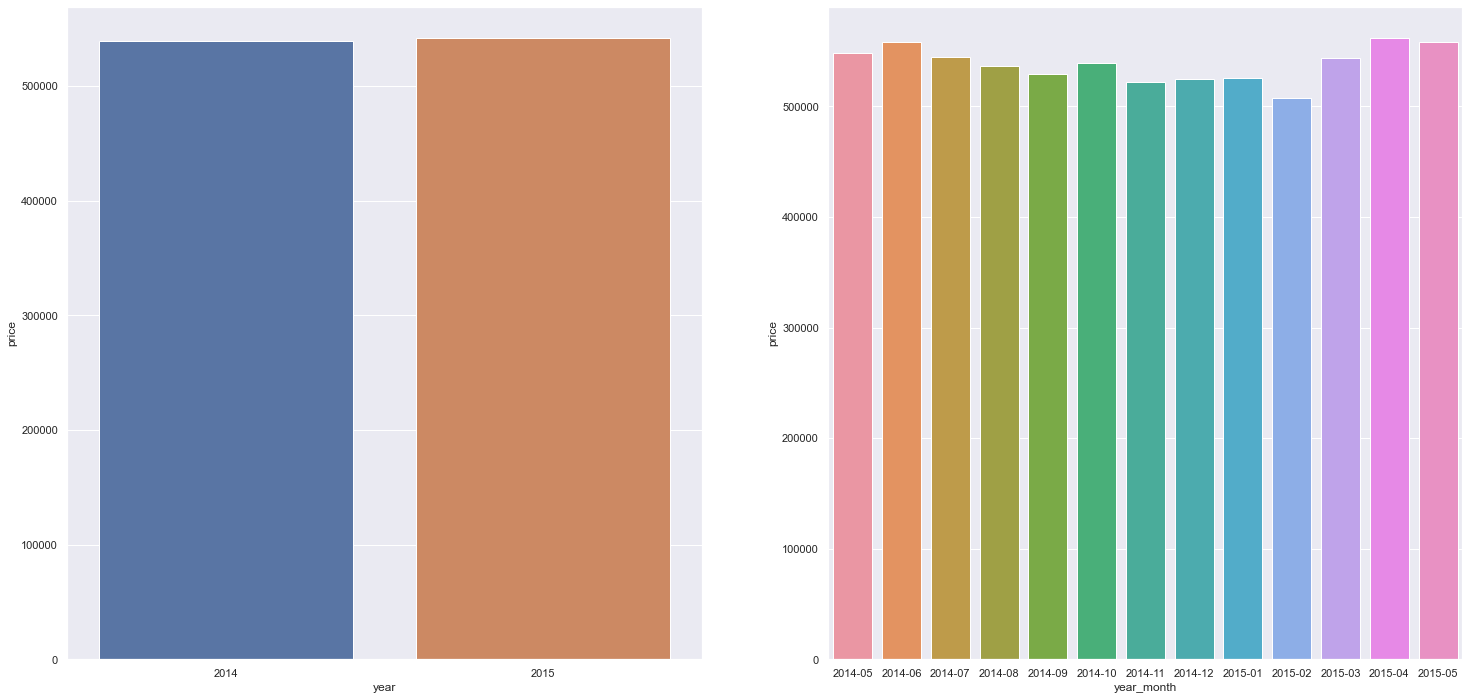

In [127]:
aux1 = data[['year', 'price']].groupby( 'year' ).mean().reset_index()
display( aux1 )
delta = np.round( aux1['price'][1] / aux1['price'][0], 2 )
print( f'The growth is the \033[1m{delta}\033[0m between two years' )

plt.subplot( 1, 2, 1 )
sns.barplot( x='year', y='price', data=aux1 );

plt.subplot( 1, 2, 2 )
aux2 = data[['year_month', 'price']].groupby( 'year_month' ).mean().reset_index()
sns.barplot( x='year_month', y='price', data=aux2 );

### H5: Houses with a three bathrooms have a MoM (Month over Month) growth of 15%.

**FALSE:** Number of bathrooms don't have relantionship with time.

,year_month,bathrooms
0,2014-05,70
1,2014-06,78
2,2014-07,70
3,2014-08,64
4,2014-09,71
5,2014-10,66
6,2014-11,43
7,2014-12,48
8,2015-01,41
9,2015-02,45


Growth MoM is 0.98 with three bathroom houses


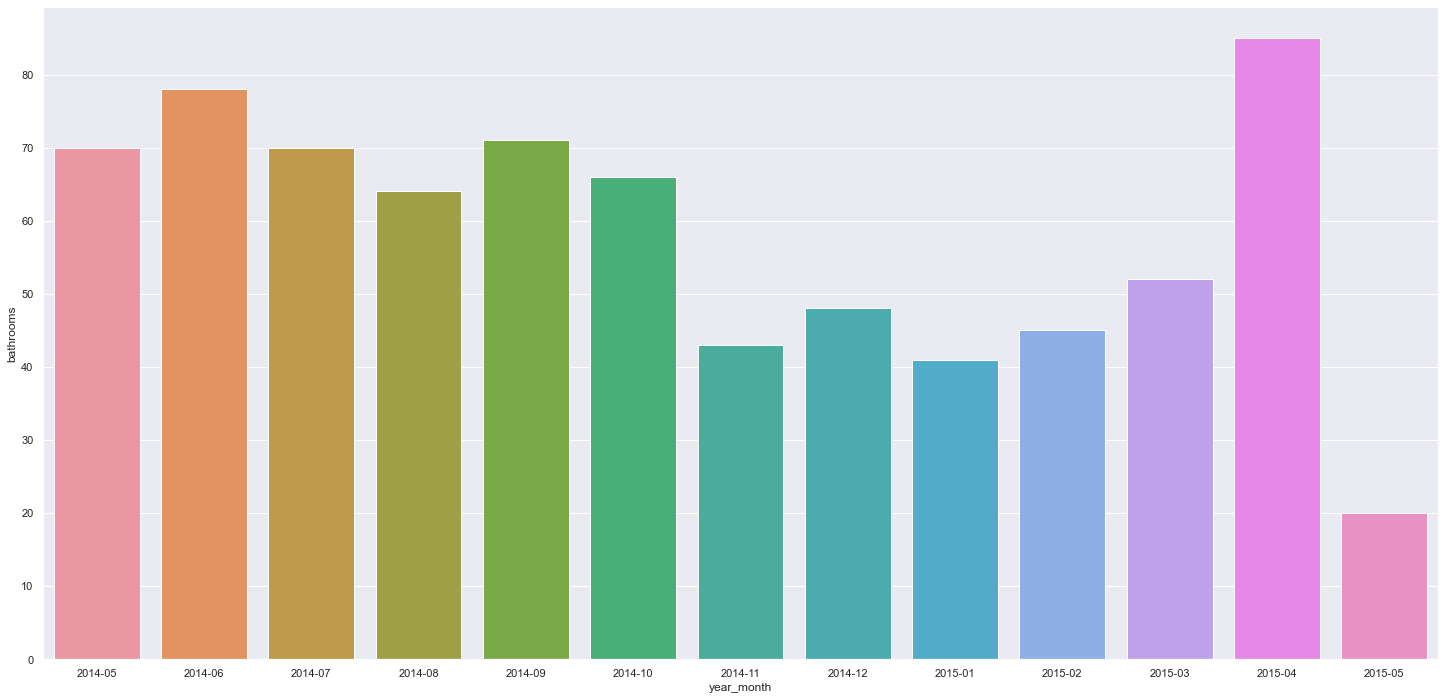

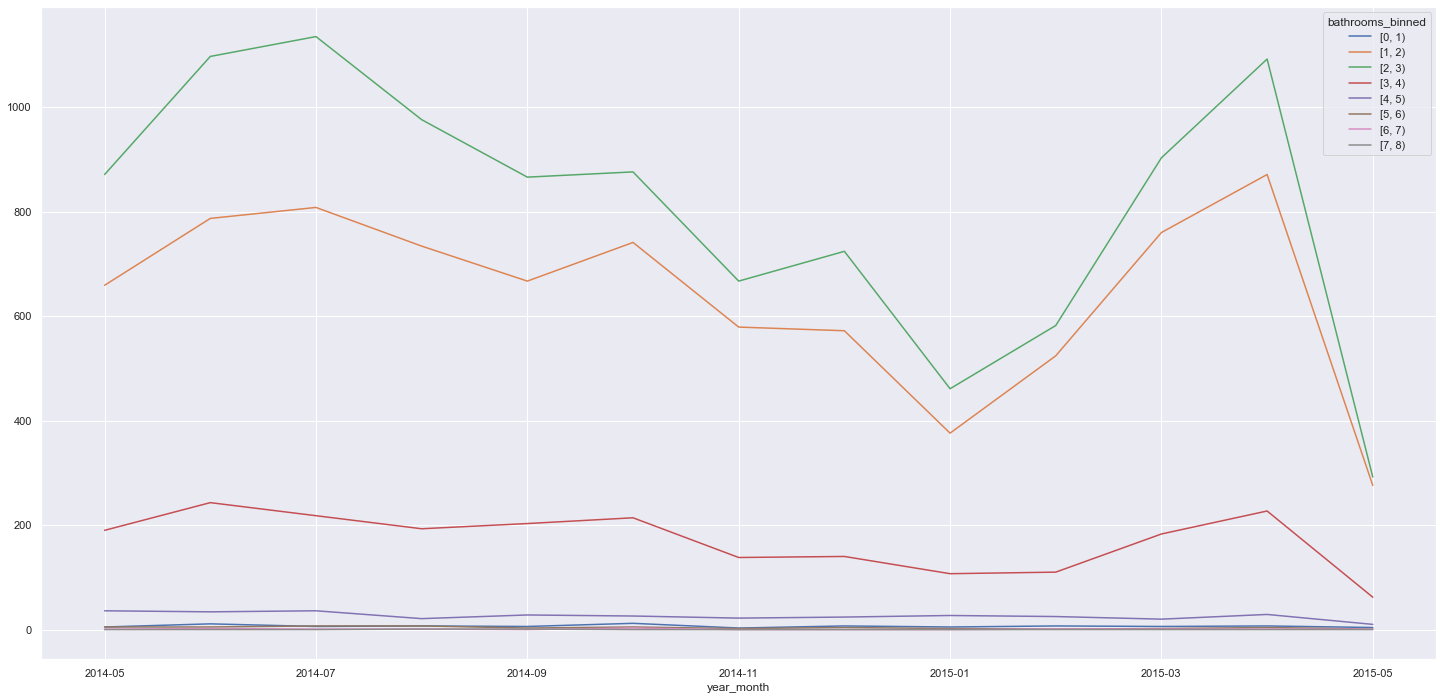

In [128]:
bins = list( np.arange( 0, 9, 1 ) )
data['bathrooms_binned'] = pd.cut( data['bathrooms'], bins=bins, right=False )

aux = data[data['bathrooms'] == 3]
aux1 = aux[['bathrooms', 'year_month']].groupby( 'year_month' ).count().reset_index()
display( aux1 )

deltas = 0
for i in range( len( aux1 ) - 1 ):
    delta = aux1['bathrooms'][i+1] / aux1['bathrooms'][i]
    deltas += delta
delta = np.round(deltas /( len( aux1 ) - 1 ), 2 )
print(f'Growth MoM is \033[1m{delta}\033[0m with three bathroom houses')

sns.barplot(  x='year_month', y='bathrooms', data=aux1 );

aux2 = data[['year_month', 'bathrooms_binned', 'bathrooms']].groupby( ['year_month', 'bathrooms_binned'] ).count().reset_index()
aux2.pivot( index='year_month', columns='bathrooms_binned', values='bathrooms' ).plot();


# 5.0 Data Transform